# Data Science 
# Assignment '#2 -  Exploratory Data Analysis



In [108]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#display wide tables 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

We have a list of 10,000 movies with IMDB user rating as imdb.txt. We want to perform a exploratory data analysis of this data in Python by using its Pandas library.  We will perform the cleaning, transformation and then visualization on the raw data. This will help us to understand the data for further processing.

In [109]:
#!head imdb.txt
Rawdata = pd.read_csv('imdb.txt', delimiter='\t', header=None)
Rawdata.head()

,0,1,2,3,4,5,6
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


## 1. Loading data

Read the imdb.txt into dataframe named data. The data is tab delimited. The columns names are 'imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'

In [110]:
# Your code here
col_names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv('imdb.txt', delimiter='\t',header=None , names=col_names)
#print total number of rows and columns
print(data.shape)
data.head()





(10000, 7)


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


__Marks = 2__

Check the data types of each column

In [111]:
# Your code here
#datatype of each column
data.dtypes


imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

__Marks = 1__

## 2. Clean the DataFrame

The data frame has several problems

1. The runtime column is stored as a string
2. The genres column has several genres together. This way, it is hard to check which movies are Action movies and so on.
3. The movie year is also present in the title


### Fix the runtime column
Convert the string '142 mins' to number 142.

In [112]:
# Your code here
runtime = '142 mins'
print(type(runtime))

runtime_in_num = int(runtime.replace('mins',''))
type(runtime_in_num)


<class 'str'>


int

__Marks = 3__

Perform this conversion on every element in the dataframe `data`

In [113]:
# Your code here
#convert runtime to numeric
data['runtime'] = data['runtime'].str.replace('mins.','').astype('Int64')
data.dtypes


C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9176\2093644989.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['runtime'] = data['runtime'].str.replace('mins.','').astype('Int64')


imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      Int64
genres      object
dtype: object

__Marks = 2__

### Split the genres

We would like to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

First, we would like to find the all the unique genres present in any record. Its better to sort the genres to locate easily.

In [114]:
#determine the unique genres

#data['genres'].unique()

#print(data['genres'].str.split('|', expand=True).stack().unique())

unique_genres_list = data['genres'].str.split('|', expand=True).stack().unique()
genres_list = sorted(unique_genres_list)
print(type(genres_list))
print(genres_list)



<class 'list'>
['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


__Marks = 4__

Then make a column for each genre

In [115]:
#make a column for each genre
for genre in genres_list:
    data[genre] = data['genres'].str.contains(genre)
print(data.shape)
data.head()


(10000, 31)


,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


__Marks = 5__

### Eliminate year from the title
We can fix each element by stripping off the last 7 characters

In [116]:
#Strip off last 7 character from title
data['title'] = data['title'].str[:-7]
data.head()


,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


__Marks = 1__

## 3. Descriptive Statistics

Next, we would like to discover outliers. One possible way is to describe some basic, global summaries of the DataFrame on `score`, `runtime`, `year`, `votes`.

In [117]:
#Call `describe` on relevant columns
data[['score', 'runtime', 'year', 'votes']].describe()


,score,runtime,year,votes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.386070,103.578400,1993.472800,16604.012800
std,1.189933,26.628698,14.829924,34563.459698
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2333.750000
50%,6.600000,102.000000,1998.000000,4980.500000
75%,7.200000,115.000000,2005.000000,15277.750000
max,9.200000,450.000000,2011.000000,619479.000000


__Marks = 1__

Do you see any quantity unusual. Better replace with NAN.

In [118]:
#Your code here
#there is a movie with runtime 0 replace it with NAN
data['runtime'] = data['runtime'].replace(0, np.nan)





__Marks = 1__

Lets repeat describe to make sure that it is fine

In [119]:
#Your code here
data[['score', 'runtime', 'year', 'votes']].describe()


,score,runtime,year,votes
count,10000.000000,9718.000000,10000.000000,10000.000000
mean,6.386070,106.584071,1993.472800,16604.012800
std,1.189933,20.230586,14.829924,34563.459698
min,1.500000,45.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2333.750000
50%,6.600000,103.000000,1998.000000,4980.500000
75%,7.200000,115.000000,2005.000000,15277.750000
max,9.200000,450.000000,2011.000000,619479.000000


__Marks = 1__

### Basic plots

Lets draw histograms for release year, IMDB rating, runtime distribution

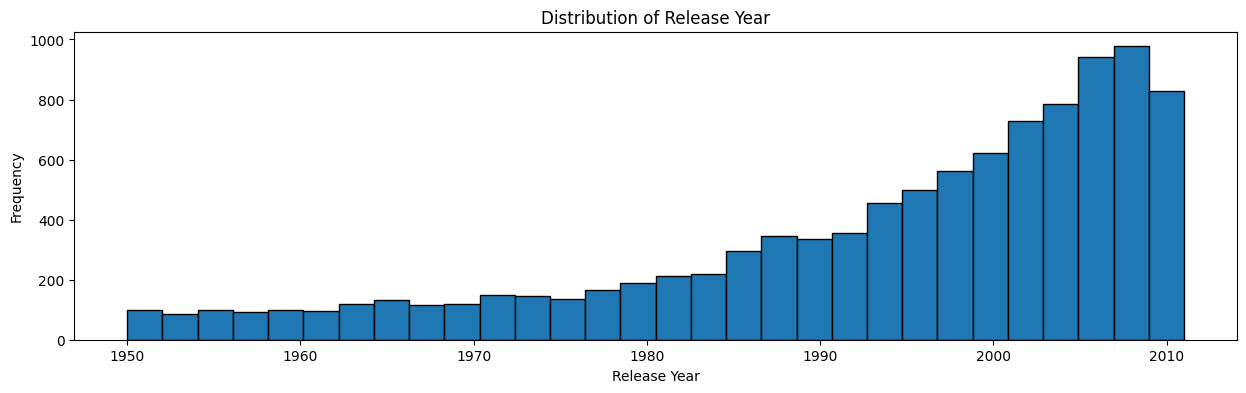

In [120]:
#Your code here
#Lets draw histograms for release year
#data['year'].plot(kind='hist', title='Release Year', bins=20 , figsize=(15, 4))
plt.figure(figsize=(15, 4))
plt.hist(data['year'], bins=30, edgecolor='black')

# Set the labels and title
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Year')

# Show the plot
plt.show()
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
# data['year'].plot(ax=axes[0], kind='hist', bins=10, title='Release Year')
# data['score'].plot(ax=axes[1], kind='hist', bins=10, title='IMDB rating')
# data['runtime'].plot(ax=axes[2], kind='hist', bins=10, title='Runtime distribution')
# plt.show()




__Marks = 1__

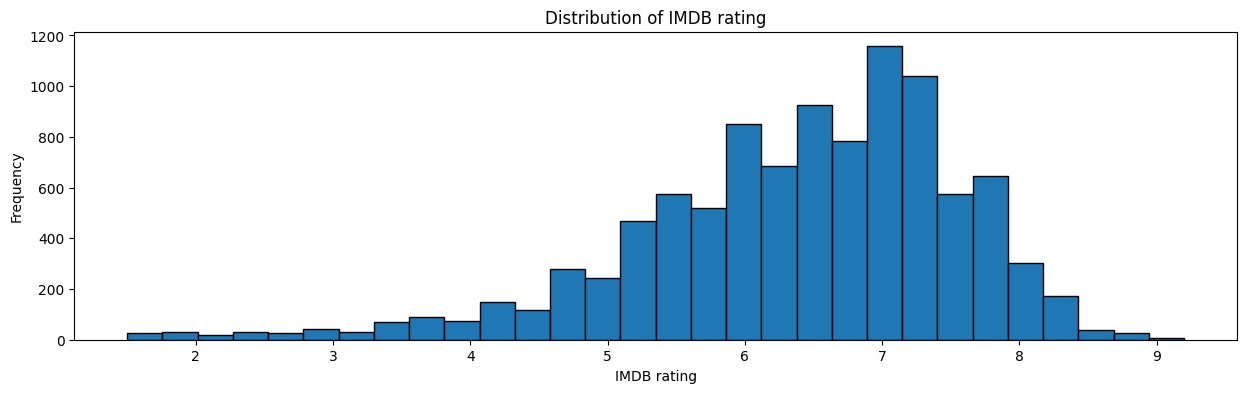

In [121]:
#Your code here
plt.figure(figsize=(15, 4))
plt.hist(data['score'], bins=30, edgecolor='black')

# Set the labels and title
plt.xlabel('IMDB rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDB rating')

# Show the plot
plt.show()

__Marks = 1__

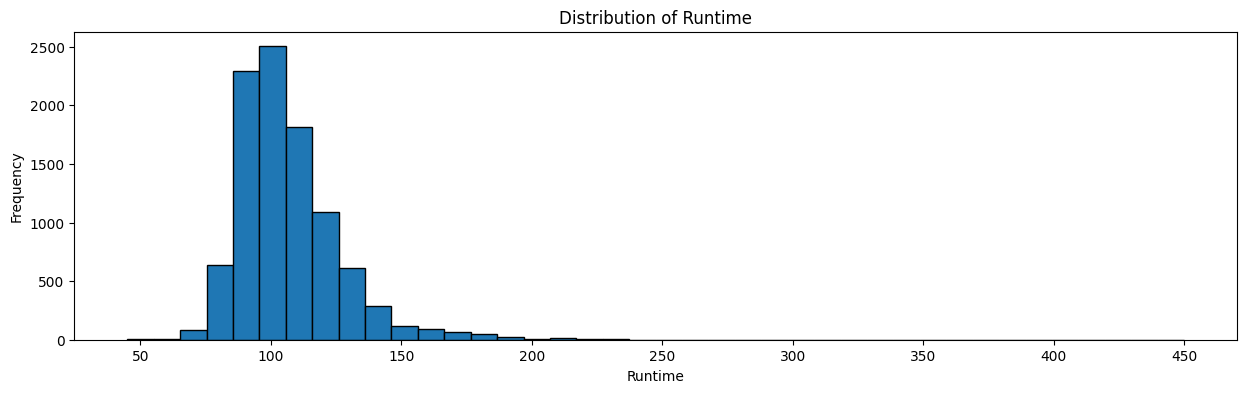

In [122]:
#Your code here
#Lets draw histograms for runtime
plt.figure(figsize=(15, 4))
data_clean = data.dropna(subset=['runtime'])
plt.hist(data_clean['runtime'], bins=40, edgecolor='black')

# Set the labels and title
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime')

# Show the plot
plt.show()



__Marks = 1__

Scatter plot between IMDB rating and years. Does it shows some trend?

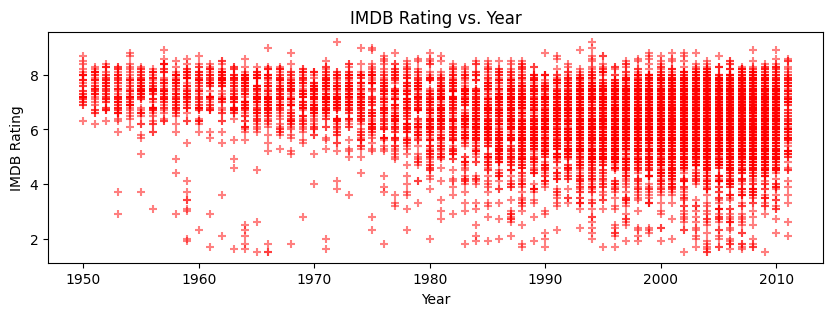

Correlation coefficient: -0.20927882983530002


In [123]:
#Your code here
plt.figure(figsize=(10, 3))
# Create scatter plot of IMDB rating vs. year
plt.scatter(data['year'], data['score'],alpha=0.5, marker='+', color='red' )

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating vs. Year')

# Show the plot
plt.show()

correlation = data['year'].corr(data['score'])
print("Correlation coefficient:", correlation)



#### IMDB Rating vs. Year  
- Relation shows that with the passage of the time more low rated have been made

__Marks = 2__

Is there any relationship between IMDB rating and number of votes? Describe

Correlation coefficient: 0.26595242101173217


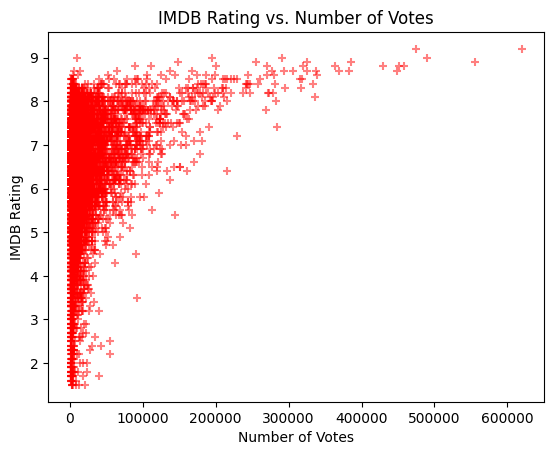

In [124]:
#Your code here
correlation = data['votes'].corr(data['score'])
print("Correlation coefficient:", correlation)


# Create scatter plot of IMDB rating vs. number of votes
plt.scatter(data['votes'], data['score'], alpha=0.5,color='red', marker='+')

# Set the labels and title
plt.xlabel('Number of Votes')
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating vs. Number of Votes')

# Show the plot
plt.show()

__Marks = 2__

### Data aggregation/Summarization

*What genres are the most frequent?* Lay down the genres in descending order of count

In [125]:
#Your code here-
#sum sums over rows by default
genre_count = data[genres_list].sum().sort_values(ascending=False)
print(genre_count)
#genre_count = np.sort(data[genres_list].sum())[::-1]
#print(genre_count)



Drama         5697
Comedy        3922
Thriller      2832
Romance       2441
Action        1891
Crime         1867
Adventure     1313
Horror        1215
Mystery       1009
Fantasy        916
Sci-Fi         897
Family         754
Music          619
War            512
Biography      394
History        358
Animation      314
Sport          288
Musical        260
Western        235
Film-Noir       40
Adult            9
News             1
Reality-TV       1
dtype: object


__Marks = 2__

Draw a bar plot to show top ten genres

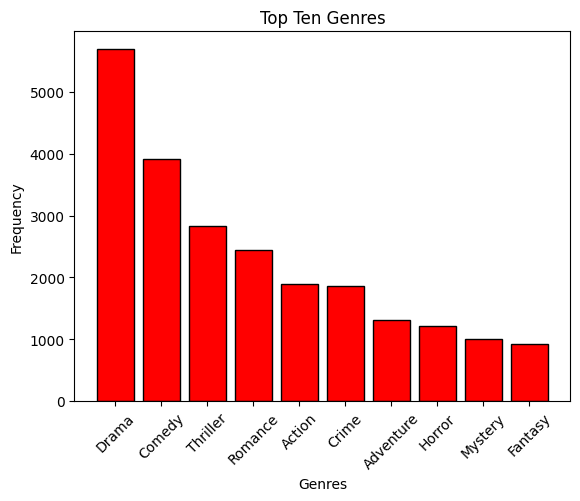

In [126]:
#Your code here
#Draw a bar plot to show top ten genres
# Select the top ten genres
top_ten_genres = genre_count.head(10)

# Create a bar plot
plt.bar(top_ten_genres.index, top_ten_genres ,edgecolor='black' ,color='red' )

# Set the labels and title
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top Ten Genres')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()




__Marks = 2__

*How many genres does a movie have, on average?*

In [127]:
#Your code here
#axis=1 sums over columns instead
#*How many genres does a movie have, on average?*
data['genre_count'] = data[genres_list].sum(axis=1)
#data.describe()
#count average number of genres
print(f"Average number of genres per movie : {data['genre_count'].mean()}")
#data['genre_count'].head()

#find the movie with maximum number of genres and min number of genres
#print(data[data['genre_count'] == data['genre_count'].max()])
#print(data[data['genre_count'] == data['genre_count'].min()])



Average number of genres per movie : 2.7785


__Marks = 2__

## Explore Group Properties

Let's split up movies by decade. Find the decade mean score and draw a plot as follows:

<img src=score-year-plot.png>

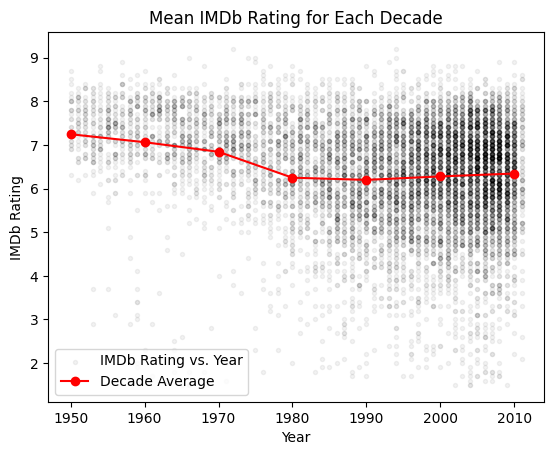

In [134]:
# #Your code here
# #Let's split up movies by decade. Find the decade mean score and draw a plot as follows:
# # Create a decade column
# data['decade'] = data['year'] // 10 * 10
# #data.head()

# # Get the mean IMDb rating for each decade
# mean_decade_ratings = data.groupby('decade')['score'].mean()
# print(mean_decade_ratings)

# plt.scatter(data['year'], data['score'], alpha=0.3)

# # Plot the mean IMDb rating for each decade with score line is from 1 to 10
# plt.figure(figsize=(5, 3))

# # Plot the decade average ratings line
 

# plt.plot(mean_decade_ratings.index, mean_decade_ratings, color='red', marker='o')

# # Set the labels and title
# plt.xlabel('Decade')
# plt.ylabel('Mean IMDB Rating')
# plt.title('Mean IMDB Rating for Each Decade')


# # Show the plot
# plt.show()



# Extract the decade from the 'year' column
data['decade'] = (data['year'] // 10) * 10

# Calculate the mean IMDb rating for each decade
mean_ratings = data.groupby('decade')['score'].mean()

# Create a scatter plot of IMDb rating vs. years as the background
plt.scatter(data['year'], data['score'], alpha=0.05, label='IMDb Rating vs. Year' , color='black', marker='.')

# Plot the mean IMDb rating for each decade
plt.plot(mean_ratings.index, mean_ratings.values, color='red', marker='o', linestyle='-' , label='Decade Average' )

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.title('Mean IMDb Rating for Each Decade')

# Add a legend
plt.legend()

# Show the plot
plt.show()


__Marks = 5__

Find the most popular movie each year


In [129]:
#Your code here
#Find the most popular movie each year
# Sort the DataFrame by year and score
data_sorted = data.sort_values(['year', 'score'], ascending=[True, False])

# Print the top movie for each year
print(data_sorted.groupby('year')['title', 'score'].head(1))

# #print details of most rated movie of all time
# print(data[data['votes'] == data['votes'].max()])


                     title  score
556           Sunset Blvd.    8.7
1034  Strangers on a Train    8.3
561    Singin' in the Rain    8.4
2350     The Wages of Fear    8.3
212          Seven Samurai    8.8
...                    ...    ...
2822   Like Stars on Earth    8.3
25         The Dark Knight    8.9
23    Inglourious Basterds    8.4
4                Inception    8.9
2923          A Separation    8.6

[62 rows x 2 columns]


C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9176\897583214.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data_sorted.groupby('year')['title', 'score'].head(1))


__Marks = 2__